In [16]:
#imports
import pandas as pd
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
#from pingouin import pairwise_ttests #this is for performing the pairwise tests

%matplotlib inline

In [17]:
#set up dataframes 
commutes_2019 = pd.read_csv('./commute_data/2019commutetimes.csv', sep=',')

commutes_2020 = pd.read_csv('./commute_data/cleaned_results.csv', sep=',')

address_map = pd.read_csv('./commute_data/address_map.csv', sep='\t')

commutes_2020.head()



,departure_times,destinations,origins,travel_time,departure_dt,hour,date,distance,minute,dayofweek
0,1607947200,"1740 Eastchester Rd, The Bronx, NY 10461, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",136,2020-12-14 07:00:00-05:00,7,2020-12-14,-1.0,0,0
1,1607947200,"4422 3rd Ave., The Bronx, NY 10456, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",131,2020-12-14 07:00:00-05:00,7,2020-12-14,-1.0,0,0
2,1607947200,"1447 St Nicholas Ave, New York, NY 10033, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",102,2020-12-14 07:00:00-05:00,7,2020-12-14,-1.0,0,0
3,1607947200,"25-10 30th Ave, Queens, NY 11102, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",98,2020-12-14 07:00:00-05:00,7,2020-12-14,-1.0,0,0
4,1607947200,"506 Lenox Ave, New York, NY 10037, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",84,2020-12-14 07:00:00-05:00,7,2020-12-14,-1.0,0,0


In [18]:
#find avg per origin stop for 2019
avgs_2019 = commutes_2019.groupby('Depart').mean()
avg_commute_2019 = avgs_2019['Avg Time']


mean2019 = avg_commute_2019.describe().loc['mean']

avg_commute_2019.head()

Depart
175th street station               32.3
179th street station               55.2
Canarsie - Rockaway Pkwy           54.7
Castle Hill Avenue Station         53.1
Jamaica Center - Parsons/Archer    56.2
Name: Avg Time, dtype: float64

In [19]:
# find avg per origin in 2020
avgs_2020 = commutes_2020.groupby('origins').mean()
#avgs_2020 = avgs_2020.set_index([pd.Index([1, 2, 3, 4,5])])
avg_commute_2020 = avgs_2020['travel_time']

mean2020 = avg_commute_2020.describe().loc['mean']

avg_commute_2020.head()


origins
102-29 215th St, Jamaica, NY 11429, USA          80.878992
108-35 167th St, Queens, NY 11433, USA           70.006723
1290 St Nicholas Ave, New York, NY 10033, USA    50.033790
1500 E 92nd St, Brooklyn, NY 11236, USA          79.809907
2300 Randall Ave, The Bronx, NY 10473, USA       80.930739
Name: travel_time, dtype: float64

In [20]:
avg_commute_2019.describe()


count     5.000000
mean     50.300000
std      10.124475
min      32.300000
25%      53.100000
50%      54.700000
75%      55.200000
max      56.200000
Name: Avg Time, dtype: float64

In [21]:
avg_commute_2020.describe()

count     5.000000
mean     72.332030
std      13.280865
min      50.033790
25%      70.006723
50%      79.809907
75%      80.878992
max      80.930739
Name: travel_time, dtype: float64

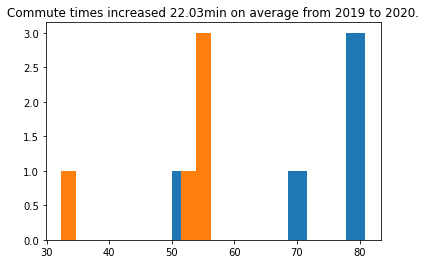

In [22]:
diff_means = mean2020 - mean2019

plt.hist(avg_commute_2020,bins = 10)
plt.hist(avg_commute_2019,bins = 10)
plt.title('Commute times increased ' + str(diff_means)[0:5] + "min on average from 2019 to 2020." )

In [25]:
# do hypothesis test to compare avg per 2019 vs 2020 on avg
T, pvalue = stats.ttest_1samp(avg_commute_2020, popmean=mean2019)
print(pvalue)  

# RESULT : pvalue is .0206, reject H0, the two samples for commute time are significantly different


0.020663403740572583


In [27]:
# do hypothesis test to compare avgs between neighborhoods in 2020
gb = commutes_2020.groupby('origins')
group_names = commutes_2020["origins"].unique()
print("\t\t\tstatistic\t\tpvalue")
for i in range(len(group_names)):
  for j in range(i+1, len(group_names)-1):
    print(i,j)
    group1 = gb[['travel_time']].get_group(group_names[i])
    group2 = gb[['travel_time']].get_group(group_names[j])
    stat, pvalue = stats.ttest_ind(group1, group2, equal_var = False)
    print(group_names[i] + " vs. " + group_names[j] + "\t" + str(stat[0]) + "\t" + str(pvalue[0]))

#RESULT - all the neighborhoods are statistically different


			statistic		pvalue
0 1
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 108-35 167th St, Queens, NY 11433, USA	32.82373608487656	1.583016968372957e-230
0 2
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 102-29 215th St, Jamaica, NY 11429, USA	-3.42115656868919	0.000624682009551223
0 3
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	88.33176598258986	0.0
0 4
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 2300 Randall Ave, The Bronx, NY 10473, USA	-3.464987419848034	0.0005312448552457569
1 2
108-35 167th St, Queens, NY 11433, USA vs. 102-29 215th St, Jamaica, NY 11429, USA	-39.84634675970902	0.0
1 3
108-35 167th St, Queens, NY 11433, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	66.41764507027067	0.0
1 4
108-35 167th St, Queens, NY 11433, USA vs. 2300 Randall Ave, The Bronx, NY 10473, USA	-38.28077368070605	0.0
2 3
102-29 215th St, Jamaica, NY 11429, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	98.09019704540937	0.0
2 4
102-29 215th St, J

In [ ]:
#TODO - pairwise tests between time increased per neighborhoods